#Import the require packages

In [148]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint
import seaborn as sns
from itertools import cycle
import re

#1. Data Collection and preprocessing

#Scraping the Data and Cleaning it up

In [149]:
pages = np.arange(1,200,50)
temp=[]
for page in pages:
  page = requests.get("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=" +str(page)+ "&ref_=adv_nxt")
  headers = {"Accept-Language": "en-US,en;q=0.5"}
  soup = BeautifulSoup(page.text,'html.parser')

  movie_data = soup.find_all('div', class_='lister-item mode-advanced')

  sleep(randint(2,8))

  for item in movie_data:
    rank = item.h3.span.text
    title = item.h3.a.text
    year = item.find('span', class_='lister-item-year text-muted unbold').text.replace('\n', '').replace('(', '').replace(')', '').replace("|", '').replace(" ", '').replace("||", '').replace("I",'')
    rating = item.find('span', class_='certificate')
    runtime = item.find('span', class_='runtime').text.replace('\n','').replace('min','')
    genre = item.find('span', class_='genre').text.replace('\n', '')
    score = item.find('strong').text.replace('[', '')
    metascore=int(item.find('span', class_='metascore favorable').text.strip()) if item.find('span',class_='metascore favorable') != None else np.nan
    votes = item.find('span', attrs = {'name': 'nv'})['data-value']
    gross = item.find_all('span', attrs = {'name':'nv'})
    grossrevenue = gross[1].text if len(gross) > 1 else ''
    director = item.find_all("p")[2]("a")[0].text
    description = item.find_all('p',class_='text-muted')[1].get_text().replace('\n','')

    temp.append([rank, title, year,rating,runtime,genre, score,metascore, votes, grossrevenue,  director,description])

df = pd.DataFrame(temp, columns=['Rank','Title', 'Year', 'Rating','Runtime', 'Genre','Score', 'Metascore', 'Votes', 'Gross', 'Director',"Description"])


#Our Dataset with the Top-200 Movies

In [150]:
df['Runtime']=df['Runtime'].astype(float)
df['Score'] = pd.to_numeric(df['Score'])
df.sort_values('Score', ascending = True)
df['Votes'] = pd.to_numeric(df['Votes'])
df.sort_values('Votes', ascending = True)
df.Gross = df.Gross.str.replace("$",'', regex = True).str.replace("M", '')
df

,Rank,Title,Year,Rating,Runtime,Genre,Score,Metascore,Votes,Gross,Director,Description
0,1.,The Shawshank Redemption,1994,[R],142.0,Drama,9.3,82.0,2804418,28.34,Frank Darabont,"Over the course of several years, two convicts..."
1,2.,The Godfather,1972,[R],175.0,"Crime, Drama",9.2,100.0,1954152,134.97,Francis Ford Coppola,"Don Vito Corleone, head of a mafia family, dec..."
2,3.,The Dark Knight,2008,[PG-13],152.0,"Action, Crime, Drama",9.0,84.0,2786108,534.86,Christopher Nolan,When the menace known as the Joker wreaks havo...
3,4.,Schindler's List,1993,[R],195.0,"Biography, Drama, History",9.0,95.0,1409851,96.90,Steven Spielberg,"In German-occupied Poland during World War II,..."
4,5.,The Lord of the Rings: The Return of the King,2003,[PG-13],201.0,"Action, Adventure, Drama",9.0,94.0,1919889,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196.,The Kid,1921,[Passed],68.0,"Comedy, Drama, Family",8.2,NaN,131648,5.45,Charles Chaplin,"The Tramp cares for an abandoned child, but ev..."
196,197.,Z,1969,[M/PG],127.0,"Crime, Drama, Thriller",8.2,86.0,30563,0.08,Costa-Gavras,The public murder of a prominent politician an...
197,198.,Sherlock Jr.,1924,[Passed],45.0,"Action, Comedy, Romance",8.2,NaN,54274,0.98,Buster Keaton,"A film projectionist longs to be a detective, ..."
198,199.,Baahubali 2: The Conclusion,2017,[Not Rated],167.0,"Action, Drama",8.2,NaN,109595,20.19,S.S. Rajamouli,"Amarendra Baahubali, the heir apparent to the ..."


#2. EDA

#What are the most popular movies in terms of Votes?

In [151]:
df['Votes'] = pd.to_numeric(df['Votes'])
df.sort_values('Votes', ascending = False).head()

,Rank,Title,Year,Rating,Runtime,Genre,Score,Metascore,Votes,Gross,Director,Description
0,1.,The Shawshank Redemption,1994,[R],142.0,Drama,9.3,82.0,2804418,28.34,Frank Darabont,"Over the course of several years, two convicts..."
2,3.,The Dark Knight,2008,[PG-13],152.0,"Action, Crime, Drama",9.0,84.0,2786108,534.86,Christopher Nolan,When the menace known as the Joker wreaks havo...
10,11.,Inception,2010,[PG-13],148.0,"Action, Adventure, Sci-Fi",8.8,74.0,2473047,292.58,Christopher Nolan,A thief who steals corporate secrets through t...
8,9.,Fight Club,1999,[R],139.0,Drama,8.8,67.0,2238682,37.03,David Fincher,An insomniac office worker and a devil-may-car...
11,12.,Forrest Gump,1994,[PG-13],142.0,"Drama, Romance",8.8,82.0,2182795,330.25,Robert Zemeckis,The history of the United States from the 1950...


#Which are  the highest (top 3) and lowest(bottom 5) rated movies in terms of Score?

In [152]:
df['Score'] = pd.to_numeric(df['Score'])
df.sort_values('Score', ascending = False).head(3)

,Rank,Title,Year,Rating,Runtime,Genre,Score,Metascore,Votes,Gross,Director,Description
0,1.,The Shawshank Redemption,1994,[R],142.0,Drama,9.3,82.0,2804418,28.34,Frank Darabont,"Over the course of several years, two convicts..."
1,2.,The Godfather,1972,[R],175.0,"Crime, Drama",9.2,100.0,1954152,134.97,Francis Ford Coppola,"Don Vito Corleone, head of a mafia family, dec..."
2,3.,The Dark Knight,2008,[PG-13],152.0,"Action, Crime, Drama",9.0,84.0,2786108,534.86,Christopher Nolan,When the menace known as the Joker wreaks havo...


In [153]:
df.sort_values('Score').head(5)

,Rank,Title,Year,Rating,Runtime,Genre,Score,Metascore,Votes,Gross,Director,Description
199,200.,My Father and My Son,2005,[Not Rated],112.0,"Drama, Family",8.2,NaN,89845,#237,Çagan Irmak,The family of a left-wing journalist is torn a...
166,167.,The Father,2020,[PG-13],97.0,"Drama, Mystery",8.2,88.0,178123,#133,Florian Zeller,A man refuses all assistance from his daughter...
165,166.,Downfall,2004,[R],156.0,"Biography, Drama, History",8.2,82.0,367410,5.51,Oliver Hirschbiegel,"Traudl Junge, the final secretary for Adolf Hi..."
164,165.,L.A. Confidential,1997,[R],138.0,"Crime, Drama, Mystery",8.2,91.0,602079,64.62,Curtis Hanson,"As corruption grows in 1950s Los Angeles, thre..."
163,164.,Pan's Labyrinth,2006,[R],118.0,"Drama, Fantasy, War",8.2,98.0,689513,37.63,Guillermo del Toro,"In the Falangist Spain of 1944, the bookish yo..."


#What are  the most popular genres(top 5)?

In [154]:
cleanGenres = df.Genre.str.split(', ', expand = True). rename(columns = {0: 'newgenre', 1: 'first', 2: 'second'})
cleanGenres.first = cleanGenres['first'].replace(" ", '')
cleanGenres.second = cleanGenres['second'].replace(" ", '')
cleanGenres.newgenre = cleanGenres['newgenre'].replace(" ", '')
cleanGenres = cleanGenres.melt(value_name = "genrex").drop(columns ='variable')
cleanGenres = cleanGenres.genrex.str.strip()

In [155]:
print("The most popular Genres are:")
cleanGenres.value_counts().head(6)

The most popular Genres are:


Drama        145
Action        52
Crime         51
Adventure     43
Mystery       30
Comedy        29
Name: genrex, dtype: int64

#Who are  the most popular directors in terms of number of Votes?

In [156]:
directors = df.groupby(by = 'Director')
print("The most popular Directors are:")
directors['Votes'].sum().nlargest(5)

The most popular Directors are:


Director
Christopher Nolan    13710570
Quentin Tarantino     7538968
Martin Scorsese       6944650
Steven Spielberg      5706286
Peter Jackson         5600490
Name: Votes, dtype: int64

#Which  movies(top 5) that have the longest Runtimes(minutes)?

In [157]:
runtime = df[['Runtime', 'Title']].sort_values(['Runtime'], ascending = False ).head(5)
print(runtime)

     Runtime                        Title
176    321.0           Gangs of Wasseypur
161    238.0           Gone with the Wind
105    229.0  Once Upon a Time in America
118    218.0           Lawrence of Arabia
35     207.0                Seven Samurai


#Which  movies (top 5) that have the shortest Runtimes(minutes)?

In [158]:
runtimeshort = df[['Runtime', 'Title']].sort_values(['Runtime']).head(5)
print(runtimeshort)

     Runtime         Title
197     45.0  Sherlock Jr.
195     68.0       The Kid
107     81.0     Toy Story
59      87.0   City Lights
58      87.0  Modern Times


#Which decade had the movies with the shortest Runtimes?

In [159]:
df['Decade'] = df['Year']
df['Decade'] = [sub[0:3] for sub in df.Decade]
df['Decade'] = df.Decade + "0's"

df[['Decade', 'Title', 'Runtime']].sort_values(by ='Runtime').groupby(by = 'Decade').mean('Runtime').round().sort_values(by = 'Runtime').head()

,Runtime
Decade,
1920's,89.0
1940's,112.0
1950's,122.0
1930's,128.0
1990's,133.0


#Show the distribution of movies over time.*

<function matplotlib.pyplot.show(close=None, block=None)>

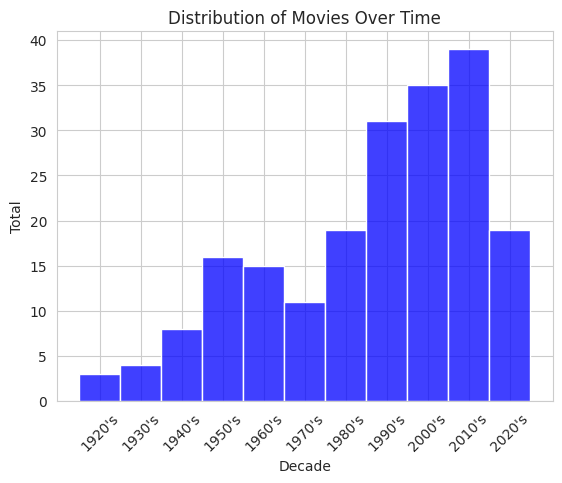

In [160]:
df.Decade = sorted(df['Decade'])
sns.histplot(data=df, x="Decade", binwidth = 5, color="blue")
plt.title("Distribution of Movies Over Time")
plt.ylabel("Total")
plt.xlabel("Decade")
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45)
plt.show

#Show the distribution of Scores and film critic ratings(Metascore) on a single chart.*

In [161]:
# Using Numpy to create an array X
X = np.arange(0,151,1)

newdf = df.dropna()

newdf.sort_values(by=['Score', 'Metascore'], ascending=[True, True], inplace=True)
newdf.reset_index(drop=True, inplace=True)

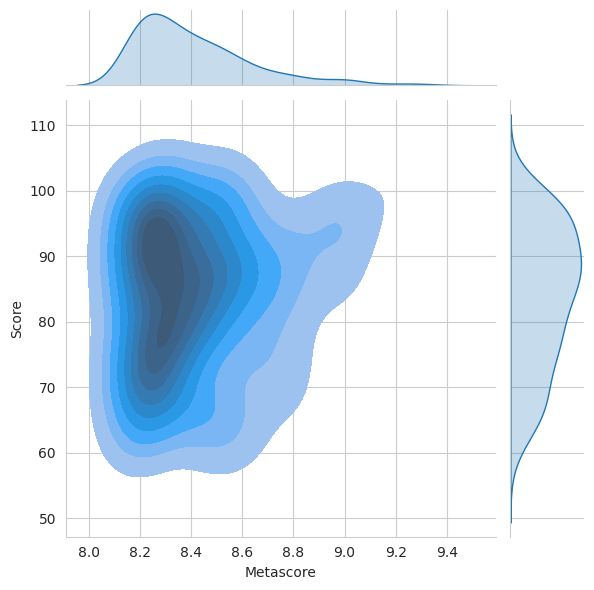

In [162]:
# Assign variables to the y axis part of the curve
y = newdf.Score
z = newdf.Metascore

# Plotting both the curves simultaneously
sns.jointplot(data = newdf, x = 'Score', y = 'Metascore', kind = "kde", fill = True)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Metascore")
plt.ylabel("Score")

# To load the display window
plt.show()

#Create a chart to display  the genres of movies (top 5) that have the longest duration(minutes)

In [163]:
df['Cleangenre'] = cleanGenres

<function matplotlib.pyplot.show(close=None, block=None)>

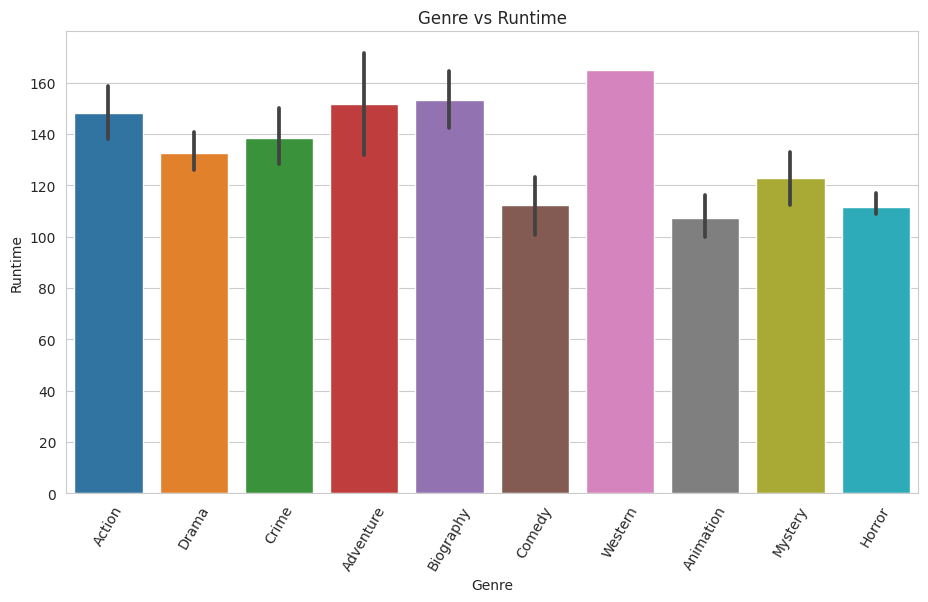

In [164]:
df=df.sort_values(['Runtime'],ascending=False)
fig, ax = plt.subplots(figsize=(11, 6))
sns.barplot(data=df, x='Cleangenre', y = 'Runtime', ax=ax).set(title='Genre vs Runtime')

plt.xlabel('Genre')
plt.ylabel('Runtime')
plt.xticks(rotation=60)
plt.show

#Create 3 additional analyses or your choice that you believe provide more insight into the data.*

Text(0.5, 0, 'Director Name')

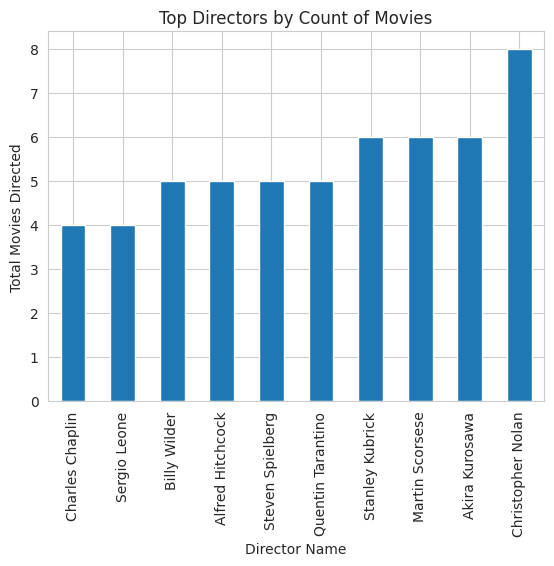

In [165]:
from pandas.core.indexers import maybe_convert_indices

df['Votes'] = pd.to_numeric(df['Votes'])
df.groupby(['Director']).size().sort_values().tail(10).plot(kind = "bar")

plt.title("Top Directors by Count of Movies")
plt.ylabel("Total Movies Directed")
plt.xlabel("Director Name")

Text(0.5, 0, 'Genre')

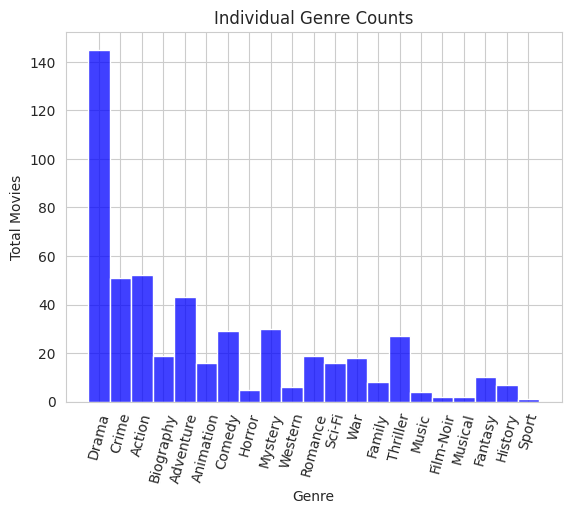

In [166]:
sns.histplot(data=cleanGenres, binwidth = 5, color="blue")
plt.xticks(rotation = 75)

plt.title("Individual Genre Counts")
plt.ylabel("Total Movies")
plt.xlabel("Genre")

In [167]:
df['Runtime'].mean().round()

136.0

We know runtimes can be as low as 81 minutes, but the average is 136 minutes

<function matplotlib.pyplot.show(close=None, block=None)>

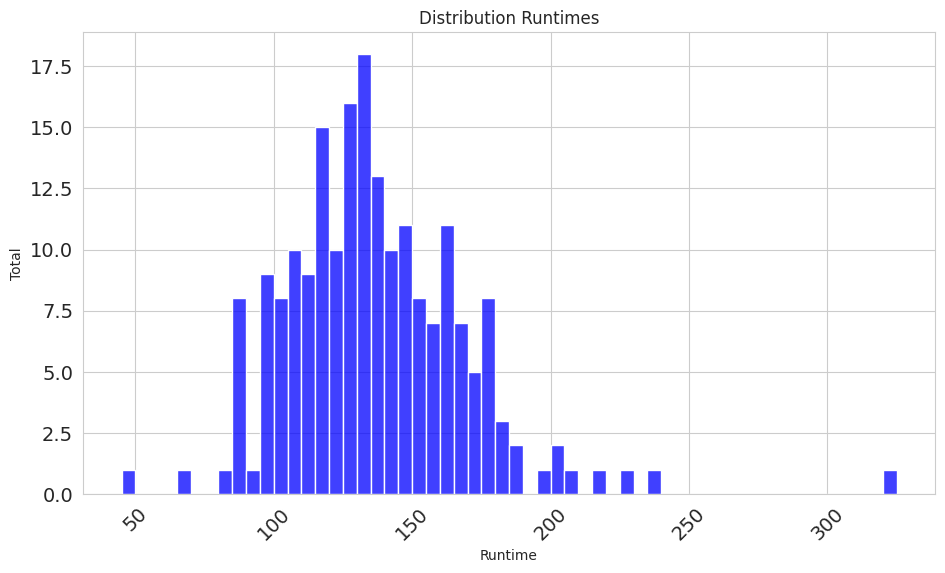

In [168]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.histplot(data=df, x="Runtime", binwidth = 5, color="blue", ax = ax)
plt.title("Distribution Runtimes")
plt.ylabel("Total")
plt.xlabel("Runtime")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)
plt.show

#3. Bivariate Analysis

#Is there a  relationship between revenue and IMDB Score?

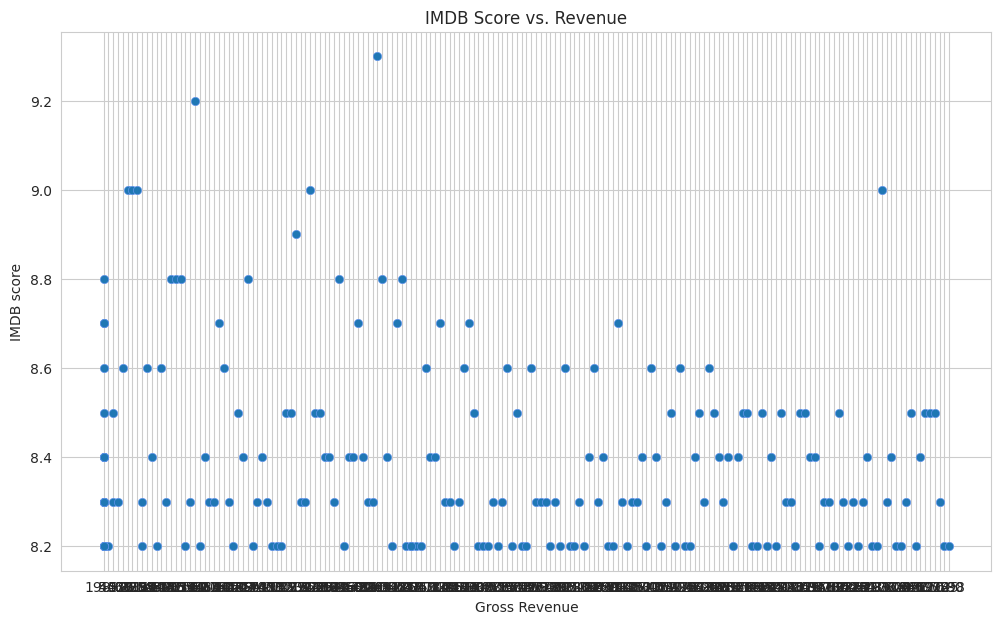

In [169]:
plt.figure(figsize=(12,7))

sns.scatterplot(x="Gross",y="Score",data=df,edgecolor="cornflowerblue")
plt.title('IMDB Score vs. Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('IMDB score')
plt.show()

In the above chart, we can observe the relationship between IMDB score and Gross Revenue. We can see that there are very few movies with IMDB score greater than 8.8. Hence we cannot observe much relation for higher IMDB score. For movies with IMDB score between 8.2-8.8, the Gross Revenue is not proportionally increasing or decreasing but scattered randomly. Hence, there might be no significant relationship between IMDB score and Gross Revenue.

#Create a chart and show the relationship between the Metascore and  the IMDB score.

Text(0.5, 1.0, 'Score vs Metascore')

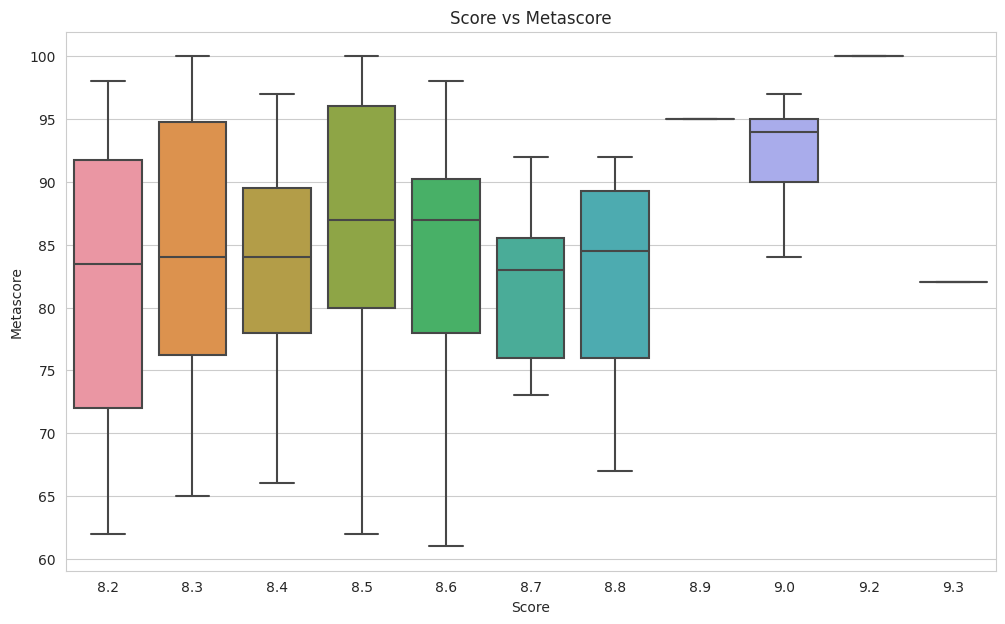

In [170]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
ax= sns.boxplot(x='Score',y='Metascore',data=df)
plt.title('Score vs Metascore')

In the above chart, we can observe the relationship between IMDB Score and Metascore, we can see that for greater IMDB score the critics score is not very high.

# Create 2 more charts if your choice that show the relationships between any variables of your choice*

**Relationship between year and runtime**

<Axes: xlabel='Decade', ylabel='Runtime'>

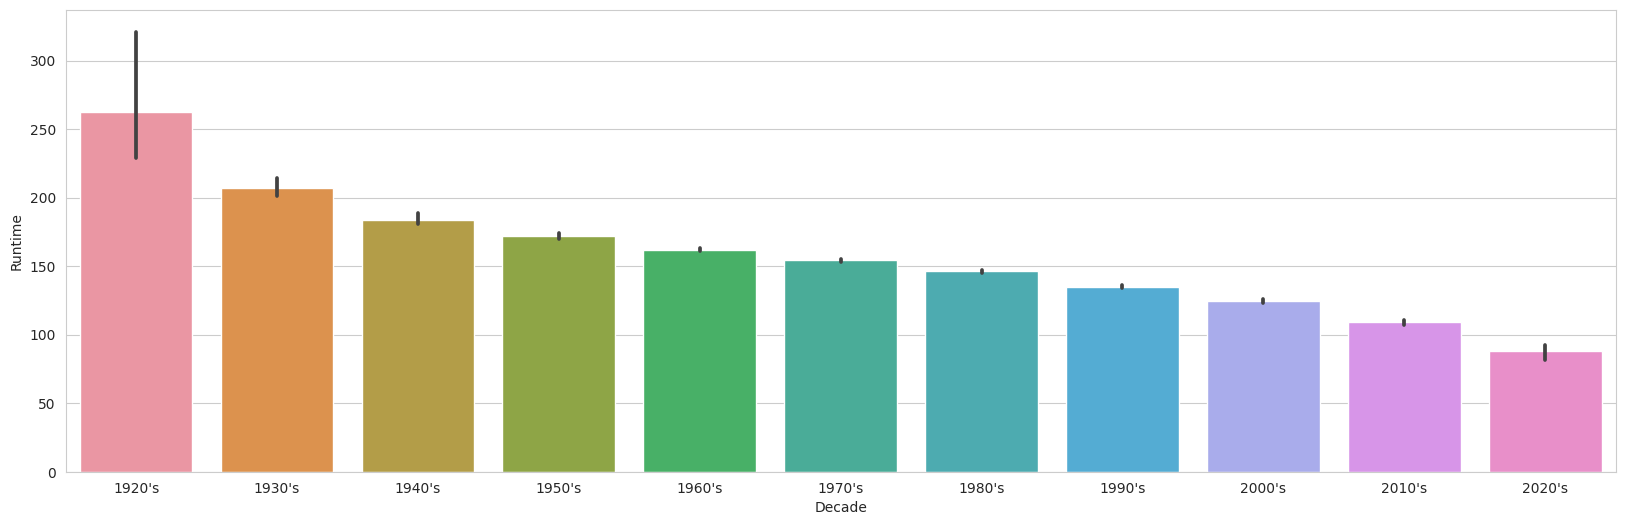

In [171]:
df['Decade'] = df['Year']
df['Decade'] = [sub[0:3] for sub in df.Decade]

df['Decade'] = df.Decade + "0's"
df.Decade = sorted(df['Decade'])

df['Runtime']=df['Runtime'].astype(float)
fig, ax = plt.subplots(figsize=(20, 6))

sns.barplot(data=df, x='Decade', y = 'Runtime', ax=ax)

In the abover barplot,we can see how the duration of the movies is changing over the decades. We can clearly obsereve through the bar plot that the duration is being decreased over the time from average of 4 hrs to 1.5-2 hours.
We all know everyone are very busy but still want to be entertained by movies, maybe that is the reason why the duration is being reduced.


**Realtionship between Metascore and votes**

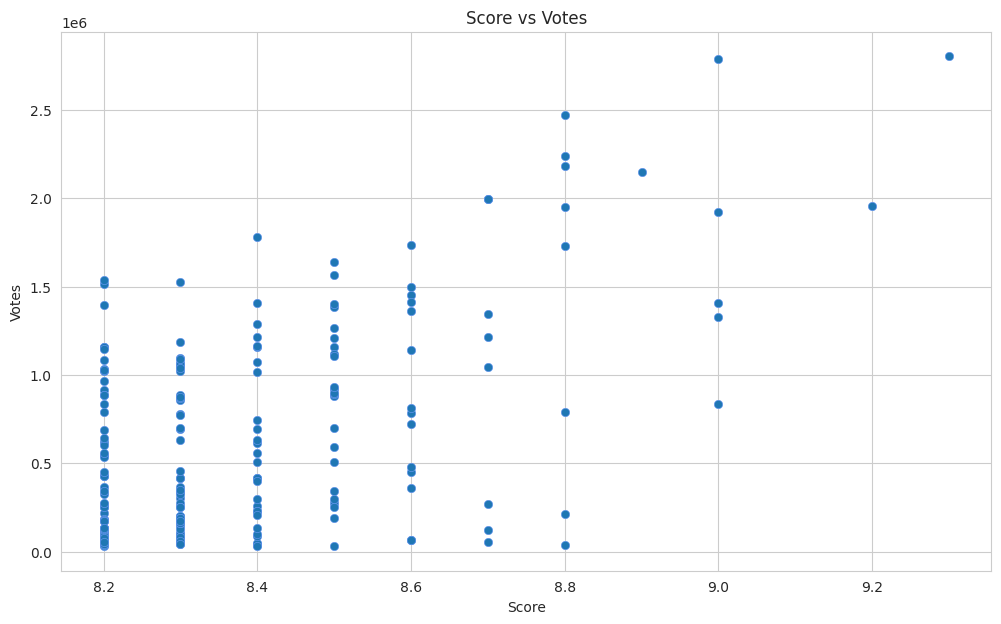

In [172]:
plt.figure(figsize=(12,7))

sns.scatterplot(x="Score",y="Votes",data=df,edgecolor="cornflowerblue")
plt.title('Score vs Votes')
plt.show()

In next analysis we did a scatter plot between votes and IMDB scores.
And as the score of the movies is increasing we can also see the there are more number of votes. We can see that there is a proportional relationship between them.

#4. Text Analysis

#Excluding stopwords, what are the 10 most popular words used in movie titles?

In [173]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [174]:
stopWords = stopwords.words('english')
df['Title.cleaned'] = df['Title'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stopWords)]))
print("The 10 most popular words used in movie titles are:")
Counter(" ".join(df['Title.cleaned']).split()).most_common(10)

The 10 most popular words used in movie titles are:


[('Drishyam', 4),
 ('-', 4),
 ('Lord', 3),
 ('Rings:', 3),
 ('2', 3),
 ('Spider-Man:', 3),
 ('Star', 3),
 ('Wars:', 3),
 ('Episode', 3),
 ('Upon', 2)]

#Do movies with longer descriptions generate more revenue or have higher Metascores?

<Axes: xlabel='Metascore', ylabel='Length.of.description'>

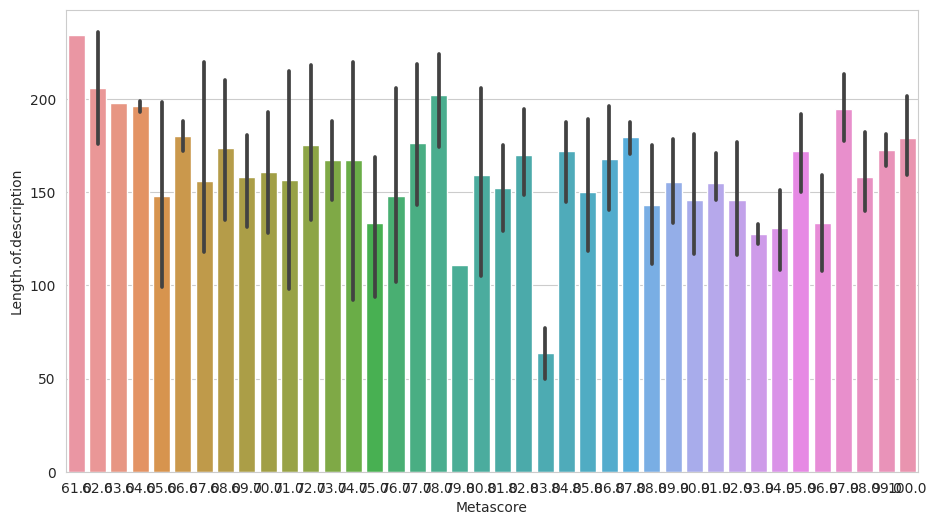

In [175]:
df["Length.of.description"] = df["Description"].apply(len)
fig, ax = plt.subplots(figsize=(11, 6))
sns.barplot(data=df, x='Metascore', y = 'Length.of.description', ax=ax)

As we can see, some of the movies with higher metascores have lower lengths. So, we can say that there is no relationship between the length of the description of a movie and its metascore.

<function matplotlib.pyplot.show(close=None, block=None)>

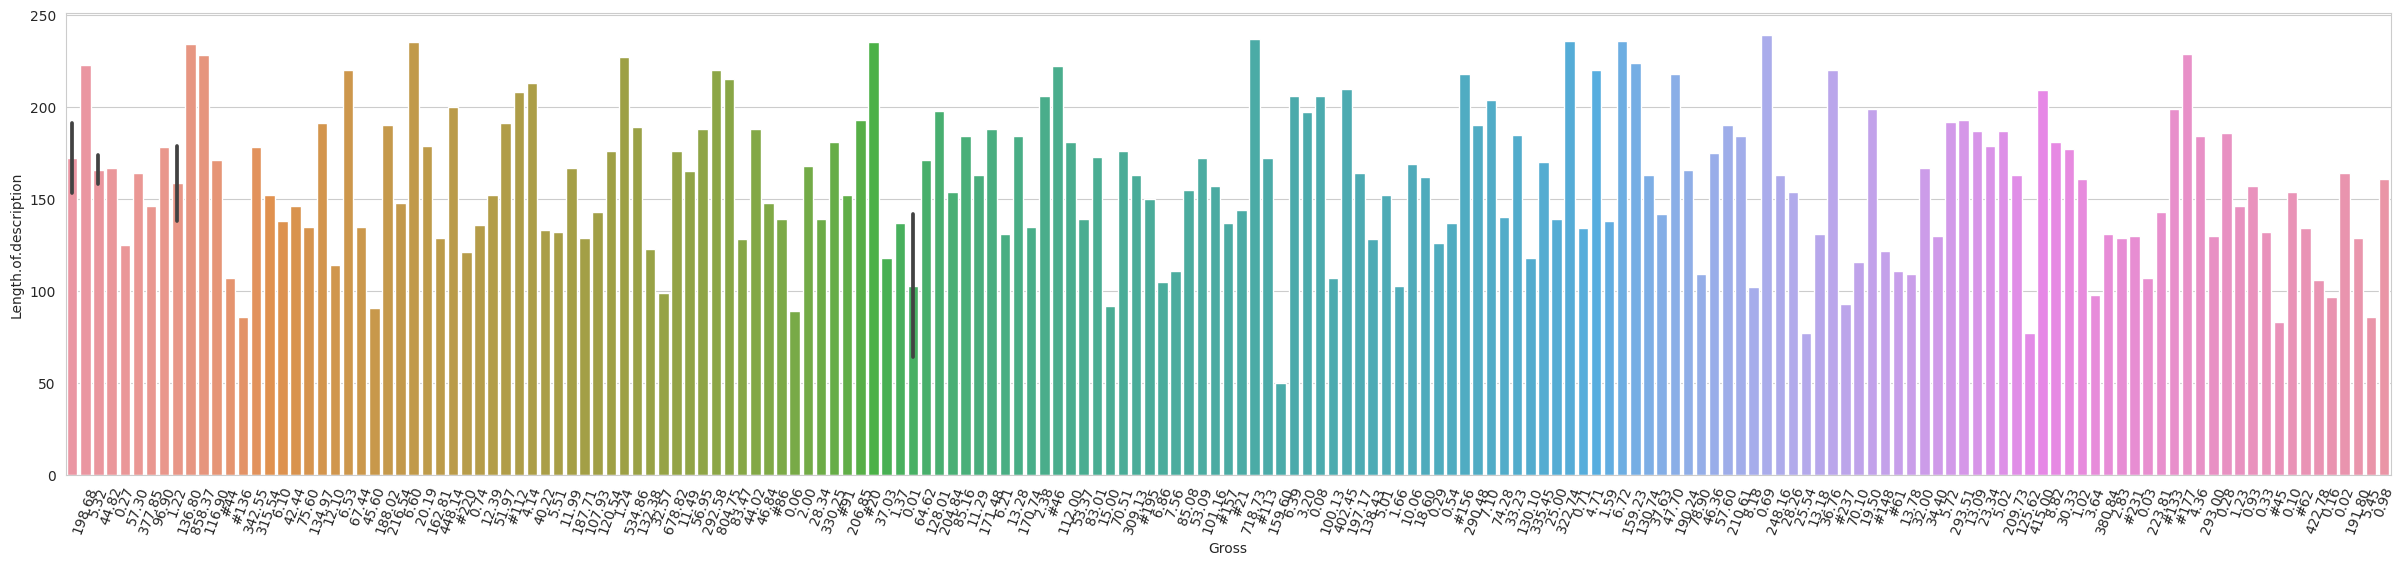

In [176]:
df["Length.of.description"] = df["Description"].apply(len)

fig, ax = plt.subplots(figsize=(30, 6))
sns.barplot(data=df, x='Gross', y = 'Length.of.description', ax=ax)
plt.xticks(rotation = 70)
plt.show

As we can see, some of the movies with longer description also have lower revenue. So, we can say that there is no relationship between the length of the description of a movie and its revenue.

#Are there differences in sentiment of the description across genre’s? *

In [177]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Processing sentiment analysis...


<function matplotlib.pyplot.show(close=None, block=None)>

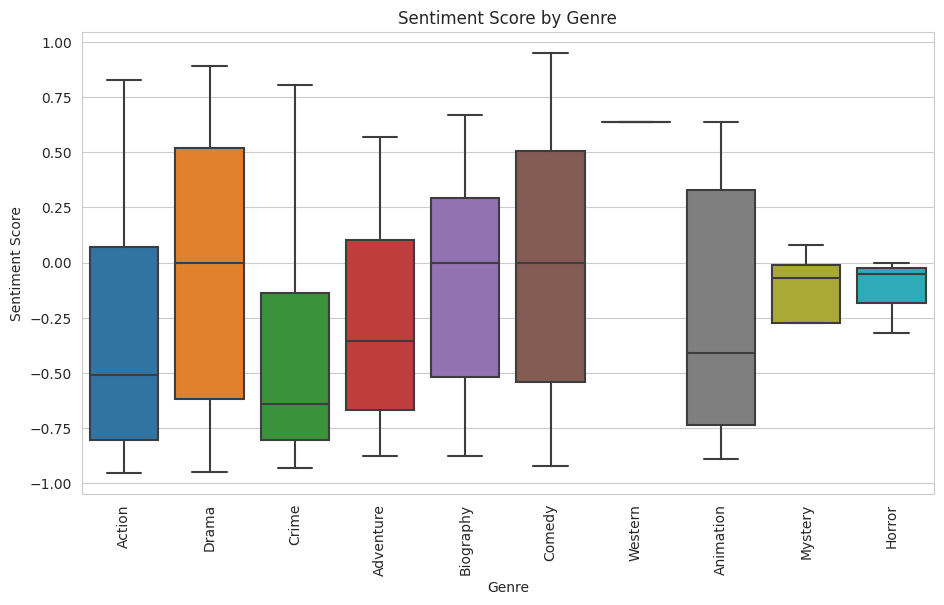

In [178]:
df1=pd.DataFrame()
df1['Rank']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

df_subset = df[['Rank', 'Description']].copy()

print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['Rank']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=pd.concat([t_df, df1], ignore_index=True)

t_df_cleaned = t_df[t_df.Rank != '99999999999']

t_df_cleaned = t_df_cleaned.drop_duplicates()

t_df_cleaned = t_df[t_df.sentiment_type == 'compound']

df_output = pd.merge(df, t_df_cleaned, on='Rank', how='inner')

fig, ax = plt.subplots(figsize=(11, 6))
sns.boxplot(data=df_output, x='Cleangenre', y = 'sentiment_score', ax=ax, showfliers=False).set(title='Sentiment Score by Genre')

plt.xlabel('Genre')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)
plt.show

It looks like descriptions for Action, Crime and Adventure have negative sentiments. Whereas Comedy and and Western have positive sentiments.

#Create 3 word clouds using the description column: one for each of the top 3 most popular genres*

In [179]:
print(df.Cleangenre)

176       Action
161        Drama
105        Crime
118    Adventure
35        Action
         ...    
58        Comedy
59        Comedy
107    Animation
195       Comedy
197       Action
Name: Cleangenre, Length: 200, dtype: object


Commonly used words in the Genre - Drama:


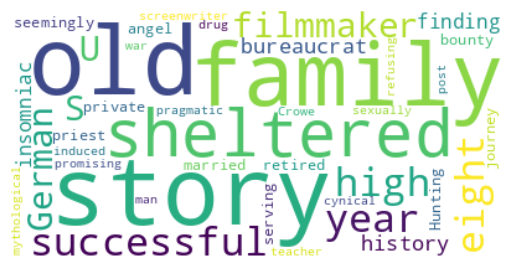

Commonly used words in the Genre - Action:


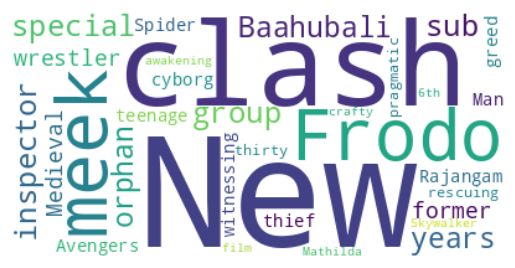

Commonly used words in the Genre - Crime:


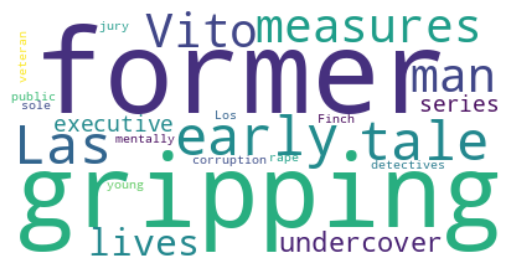

In [180]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

df.genre1 = df[df['Cleangenre'].str.contains('Drama')]
text = " ".join(i.split()[1] for i in df.genre1.Description)
word_cloud = WordCloud(collocations = False, background_color='White').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
print('Commonly used words in the Genre - Drama:')
plt.show()

df.genre2= df[df['Cleangenre'].str.contains('Action')]
text = " ".join(i.split()[1] for i in df.genre2.Description)
word_cloud = WordCloud(collocations = False, background_color='White').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
print('Commonly used words in the Genre - Action:')
plt.show()

df.genre3 = df[df['Cleangenre'].str.contains('Crime')]
text = " ".join(i.split()[1] for i in df.genre3.Description)
word_cloud = WordCloud(collocations = False, background_color='White').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
print('Commonly used words in the Genre - Crime:')
plt.show()

#Are there any interesting relationships between the text column and any of the other variables in your dataset?*

<Axes: xlabel='Decade', ylabel='Length.of.description'>

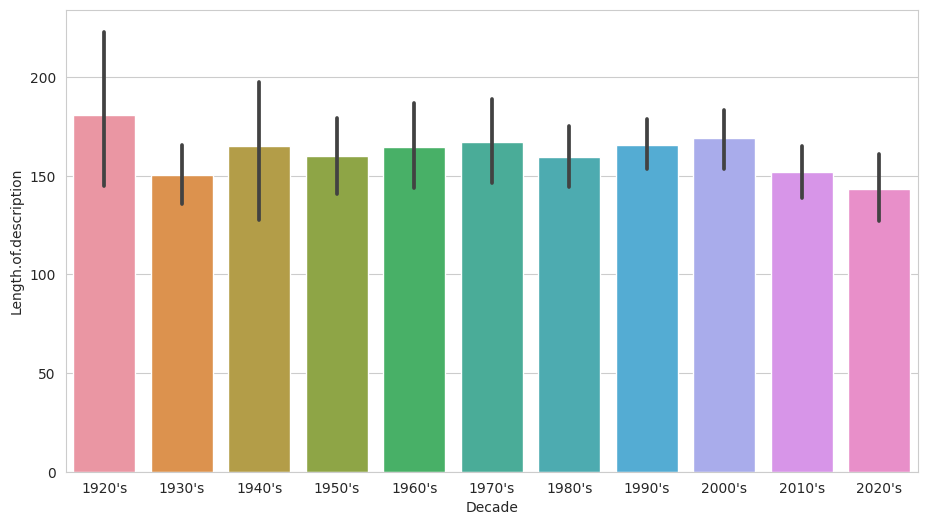

In [181]:
df["Length.of.description"] = df["Description"].apply(len)
fig, ax = plt.subplots(figsize=(11, 6))
sns.barplot(data=df, x='Decade', y = 'Length.of.description', ax=ax)

 No, there seems to be a up and down in the runtime through the decades and we currently have the least run time in our current decade.

<Axes: xlabel='Score', ylabel='Length.of.description'>

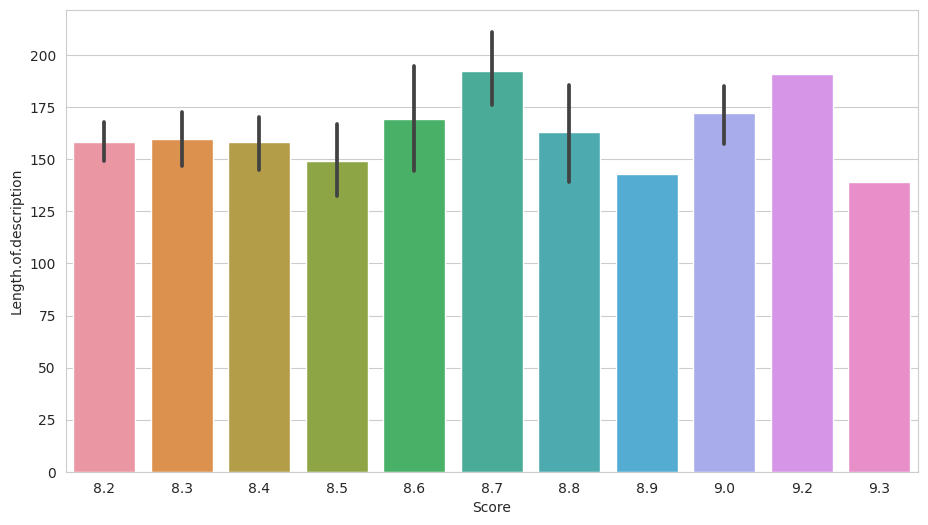

In [182]:
df["Length.of.description"] = df["Description"].apply(len)
fig, ax = plt.subplots(figsize=(11, 6))
sns.barplot(data=df, x='Score', y = 'Length.of.description', ax=ax)

It looks like the movies with high rating have a lower length of description.

#5. Comparative Analysis

#Pick any two decades and do a comprehensive comparative analysis of movies in those two decades. Your analysis must address at least 5 interesting questions. None of the questions can be those listed in the EDA section of this document. *

<function matplotlib.pyplot.show(close=None, block=None)>

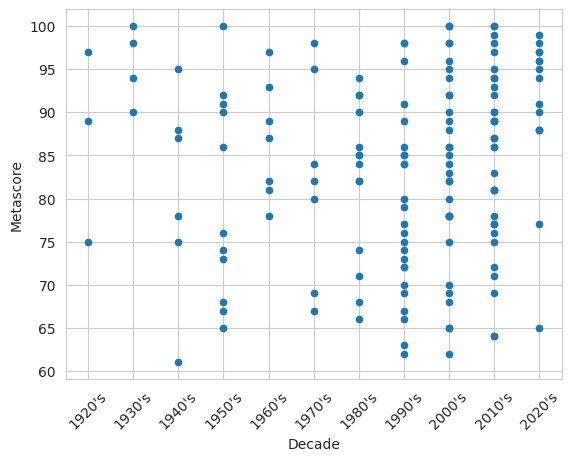

In [183]:
df.plot(kind='scatter', x='Decade', y='Metascore')
plt.xticks(rotation = 45)
plt.show

Over the decades, we can observe that the metascore(critics score) is increasing. As the popularity for the movies increases, there are many critics who would want to rate the movies and hence the metascore is increasing.

<function matplotlib.pyplot.show(close=None, block=None)>

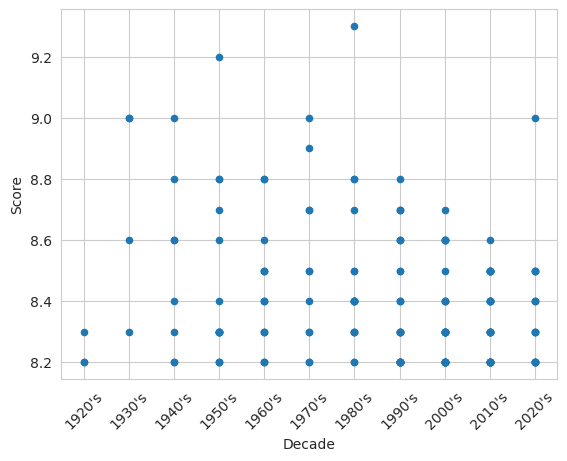

In [184]:
df.plot(kind='scatter',x='Decade',y='Score')
plt.xticks(rotation = 45)
plt.show

Over the decades, we can observe that the score for the movies is decreased. This might be because there are less number of movies with higher rating in the list we have taken or the good scored movies are decreasing.

<Axes: xlabel='Decade', ylabel='Votes'>

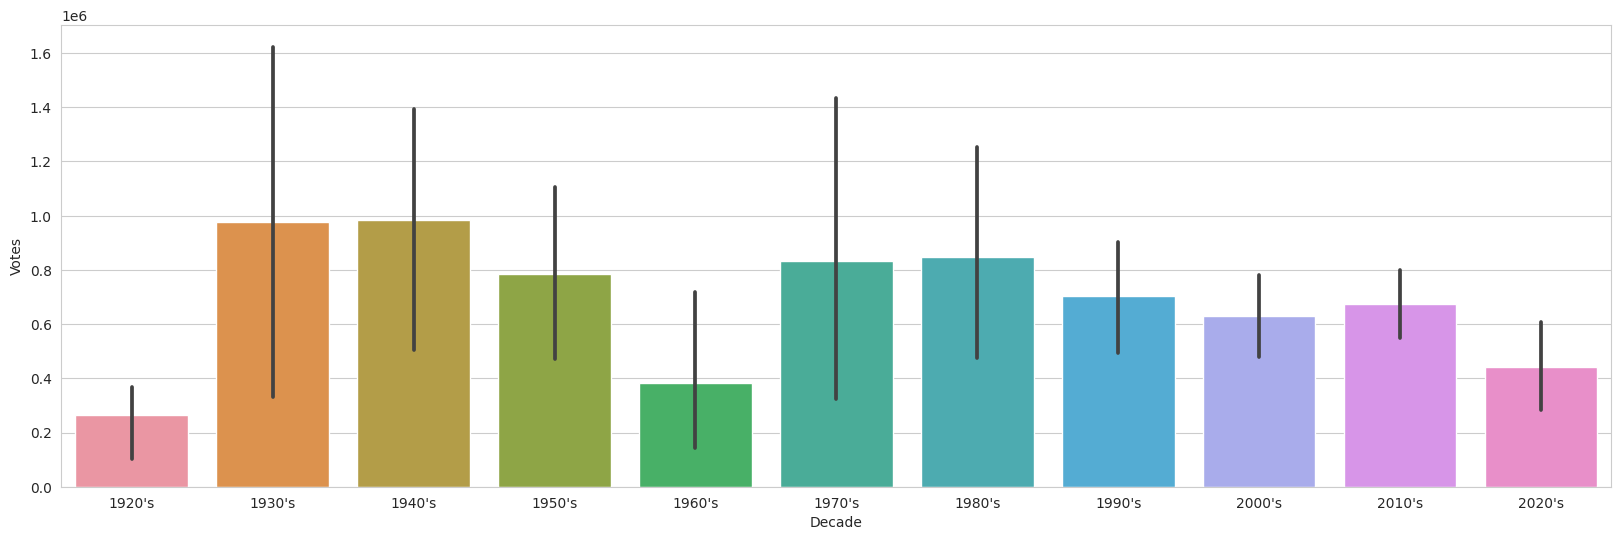

In [185]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=df, x='Decade', y = 'Votes', ax=ax)

Over the decades, the number of votes does not really follow a pattern, but as compared to the 1940's, the number of votes are decreased.

<Axes: xlabel='Decade', ylabel='Length.of.description'>

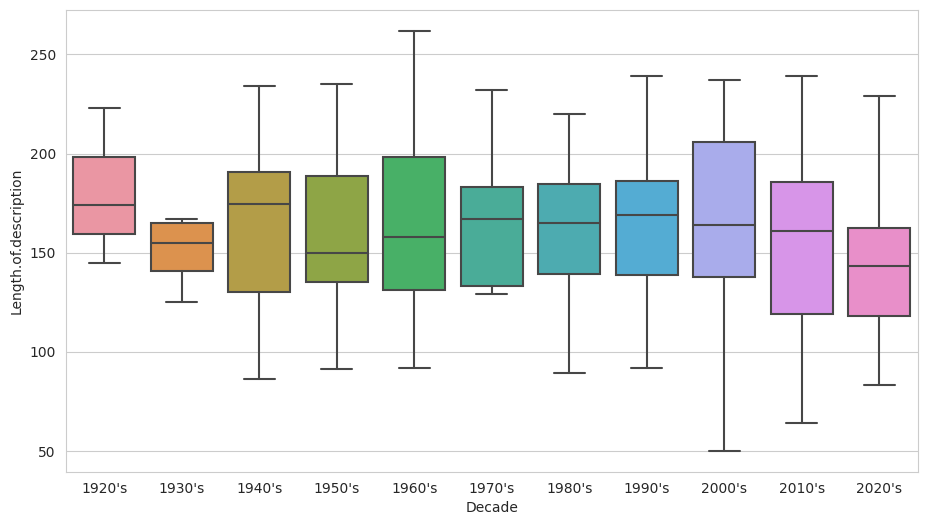

In [186]:
df["Length.of.description"] = df["Description"].apply(len)
fig, ax = plt.subplots(figsize=(11, 6))
sns.boxplot(data=df, x='Decade', y = 'Length.of.description', ax=ax)

Over the decades, the length of description has increased in 1960's and started decreasing but in 2000's we can see an increase.

<Axes: xlabel='Decade', ylabel='Length.of.title'>

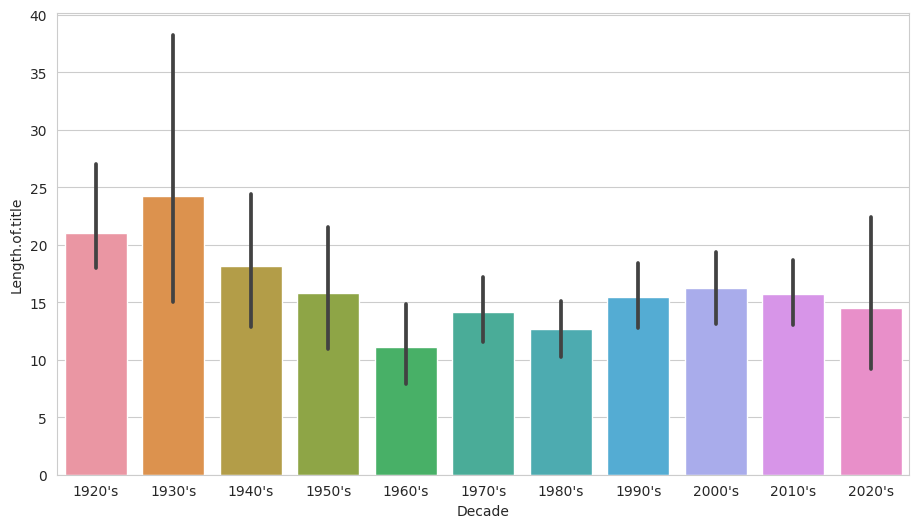

In [187]:
df["Length.of.title"] = df["Title"].apply(len)
fig, ax = plt.subplots(figsize=(11, 6))
sns.barplot(data=df, x='Decade', y = 'Length.of.title', ax=ax)

Over the decades, the length of the title is decreased but we can see an increment in recent decades.